# Session 6 Files and Remote Data
## Learning outcomes

By the end of this session, you will be able to:
- Read and write local files in a variety of formats
- Use the requests library to access data over the internet
- Extract part of a web page contents


# 6.3 Local File Processing -- RMD58
## 6.3a Os to navigate and access local storage

## 6.3a Os to navigate and access local storage
- Navigate
- Search
- Operating System specific path operations

In [11]:
import os

[To camera]
Hi in this video we are going to have a look at the OS package which can be used to navigate and access your local storage.
You can use it to search for specific files or directories and you can use it also to Confirm if a directory or a file either exists or is a file or a directory

so without further ado let's see some examples

---

[Screencast]
so first of all we have to import the OS module and we do that like this

---

then we can use OS all of its methods, functions and classes

the first thing we might want to do is to see where we are executing this script or this file 

In [12]:
os.getcwd()

'C:\\Users\\moa00512\\OneDrive - University of Stirling\\Jupyter\\Session6'

to do that we use the get cwd method 

which is just get current working directory 

and if we execute that

---

we get the full path to where this file is 

and because I'm executing this on an operating system that uses forward slash
I get a path that I can directly use in my programme
You might get different results on your machine.

Okay, so what can we do with this information?

In [3]:
here = os.getcwd()
data_dir = here + "/" + 'test.json'
print(data_dir)

C:\Users\moa00512\OneDrive - University of Stirling\Jupyter\Session6/test.json


In [4]:
type(os.path.join(os.getcwd(),'test.json'))

str

In [5]:
type(os.getcwd())

str

In [17]:
os.path.join('/Users/saemundur/OneDrive - University of Stirling/UofS/Teaching/Insendi_ITNPBD2/upload_folders/session06','test.json')

'/Users/saemundur/OneDrive - University of Stirling/UofS/Teaching/Insendi_ITNPBD2/upload_folders/session06\\test.json'

We might perhaps need something in this directory called test.json that I wanted to access

I could manipulate the path that i get from “get current working directory” by just adding the forward slash and the string “test.json” to the path that I got from that method

which works 

---

but what if I wanted to execute the same script on another computer or elsewhere on my computer 

Somewhere I don't know the path structure or the operating system beforehand?

OS implements the path module which is used to manipulate and navigate your local storage and Takes care of all of that for you

---

so to add or extend the path with a new directory we use the join method which does the same thing as our manual method above

---

as you can see.

but here we don't have to assume forward or backslash and we don't have to assume the current working directory either

Best practice coding makes as few assumptions as possible
Because, the more generalised we can make our code the better.

In [18]:
# What would happend if you tried to open this
"nonsense/path/to/non-existing/file"

'nonsense/path/to/non-existing/file'

In [15]:
print(os.path.exists("nonsense/path/to/non-existing/file"))
print(os.path.exists(os.path.join(os.getcwd(),'test.json')))

False
False


As for example when we are manually navigating through File Explorer 

we know what's there because we see it there.

however we can't assume that the program we are writing will always be executed with the same file structure

And we also can't be sure that what we're trying to access actually exists

Like in this example nonsense path

so there's another function in the path module simply called “exists” 

---

Which cheques if the full path exists whatever it might be a file or a directory

---

And as you can see the path to current working directory with the added test Jason exists

It is a good thing we can cheque 

because if we try to access something that doesn’t exist we would get an exception and our program would fail

And it also matters if what we're trying to access is a file or a directory

In [19]:
the_path = os.path.join(os.getcwd(),'test.json')
print(os.path.isdir(the_path))
print(os.path.isfile(the_path))

False
False


if we want to know if the path we have points too a directory or a file we have two functions:

isdir and isfile 

that cheque if the path is either a directory or a file 

I think you can guess which one is which

---


testing both on our test.json we see that isdir will return false and isfile will return true

The path module also implements a couple of other handy functions

In [ ]:
os.path.dirname('/home/saemi/library/school/data/insendi.html')

In [7]:
print(os.path.basename('/home/saemi/library/school/data/insendi.html'))
print(os.path.basename(os.getcwd()))

insendi.html
Session6


to inspect paths for example the dirname function 

---

will give you The directory's name of a string that represents a path
 
and the path doesn't need to exist at all actually

---

See if we change the string to the nonsense path we had before

"nonsense/path/to/non-existing/file"

and execute again.

---

it still works

we still get everything except the last part

the opposite of dirname is the base name function

---

which will give you the last part of a path

so, let's try that on the same path string as before and also on our current working directory

---

and as you can see, we got the HTML file and our current directory without the full path to it.

The last thing I want to show you from the OS module is the walk function

In [13]:
for base, dirs, fids in os.walk(os.getcwd()):
    print(base)
    print(dirs)
    print(fids)

C:\Users\moa00512\OneDrive - University of Stirling\Jupyter\Session6
['.ipynb_checkpoints']
['abalone.csv', 'session6_exercise.csv', 'Session6_Exercises.ipynb', 'session6_people.json', 'Session6_Script.ipynb', 'Session6_Solutions.ipynb', 'surveydata.xml']
C:\Users\moa00512\OneDrive - University of Stirling\Jupyter\Session6\.ipynb_checkpoints
[]
['Session6_Script-checkpoint.ipynb', 'Session5_Exercises-checkpoint.ipynb']



It's an iteration function which, like the name implies, walks from a specific path point and recursively through all sub directories, sub-sub directories and so on

listing all directories and files on its way.

For every directory that it descends into, it will produce the path or base name, a list of subdirectories, and a list of files.

Let’s try it with our current working directory, Which shouldn't contain much 

---

but you see first the name of the working directory 

followed by a list of a single sub folder 

and then every file contained within the current directory 

then it entered the sub folder and listed the same for that


Now you should go and try out some of the exercises for this session where you will be able to see how the OS module can navigate your own local storage


# 6.3b File handling -- RMD59

# File handling
- Reading and writing
- open
- with as

Hi, in this video we will look at how we can use Python to read and write to files on your local storage
for that we will use the open function and you will also be introduced to the with-as function.

So, let's just get started

In [ ]:
import os

First we'll import the OS module as we'll use one of it's functions to check if the file we will be working with exists or not.

---


In [ ]:
print(os.path.exists('test_data.txt'))

In [22]:
fid = open('test_data.txt','w')
print(fid)

<_io.TextIOWrapper name='test_data.txt' mode='w' encoding='cp1252'>


In [23]:
fid.write('This is the first line, because the w (write) flag overwrites anything that was here before\n')
fid.write('This is the second line\n')

24

In [24]:
fid.close()

In [25]:
print(os.path.exists('test_data.txt'))

True


In this demonstration we're going to be working with a single file:

test, underscore, data, dot txt
Before we do anything, we'll check if it exists.

---

and as you can see, it doesn't.
Which is fine, since our first task will be to write into it

---

For Python to be able to work with contents of files it has to open them, for that purpose we use the open function

and for our first example we're going to write a couple of lines into the file

The open function requires, at the bare minimum, the name of the file that you want to open And if that's the only argument then Python will assume that you're reading the file
to be able to write to a file we have to specify the mode argument which will be a single character flag indicating what we want to do
The write flag is a W

---

the open function returns a file object Which has a few methods

---

one of which is called write
and by calling it with some strings as arguments we've written to the file.

---

after we've written all that we want to the file

---

we have to close it

for that purpose we call the close method on the file object itself

---

Strictly speaking, it is not absolutely necessary to close the file

Best case scenario, the interpreter will close it for you when you stop using it.
But since the interpreter doesn't know when that happens, until you maybe overwrite the varible

it might not happen until you shutdown the python kernel

additionally, in some instances, Python won't actually write to the file until it is closed, 

keeping everything we wrote in buffer memory 

But, okay, we have now closed the file. Does it exist?

---

yes it does

so the W flag will not only write to a file but it will also create it if it doesn't exist

however, there's one caveat in using that flag and that is, if a file exists the W flag will make Python overwrite whatever was in the file before, so it will start with a clean slate every time you open a file like this

to be able to add to files we have to use the A flag which stands for append,

In [26]:
with open('test_data.txt','a') as fid:
    fid.write('This will be added at the end of the file because we used the a (append) flag')

here we open the same file with the append flag and write a single line into it

---

you've probably noticed that in this cell we didn't explicitly close the file 

but we've encompassed the open function in a with argument

a with clause will take care of that for you

what that essentially does is it creates the variable after the keyword "AS" which contains the file object 

and then when the script exits the body of the with statement 

it will call the close method behind the curtains

This is the preferred method of working with opening and closing files 

it saves you from having to think about garbage collection and unnecessary memory use

In [27]:
with open('test_data.txt','r') as fid:
    text = fid.read()
print(text)

This is the first line, because the w (write) flag overwrites anything that was here before
This is the second line
This will be added at the end of the file because we used the a (append) flag


so if we continue with our example we can open the test data file to be read with the R flag

The file object has a couple of methods to explore the content of the file
The first one is just read, which reads the whole document into a single string like this

---

For a large file that might not be the best approach.

In [28]:
with open('test_data.txt','r') as fid:
    print(fid.readline())
    print(fid.readline())

This is the first line, because the w (write) flag overwrites anything that was here before

This is the second line



We can also read a single line at a time like here.

---

and you see the first two lines we wrote are returned
And the file object keeps track of its location in the file.

So if you want the first line again you’ll either have to close and open the file again or use the seek method 

which I’ll allow you to read-up-on, yourselves

Now we wouldn't want to call this method for every line in the file 

because in most cases we don't know how many lines in a file there are 

but we're in luck we don't have to

In [ ]:
with open('test_data.txt','r') as fid:
    print('first line: ',fid.readline())
    for line in fid:
        print('line: ',line)

In [ ]:
with open('test_data.txt','r') as fid:
    all_lines = fid.readlines()
display(all_lines)

because if we treat the file objects as an iterator like here
The for loop will just feed us everything that's in the file line by line

---

And notice that the first line was only printed once and not as part of the for loop because the file object is keeping track

In big data, when files are huge, bite sized iterations similar to this are preferred, 

treating data as streams and dealing with it for example line by line.

However if you have enough memory and are just going to treat the raw content of the file line by line in a list.

You might as well use the plural form of the read line method, readlines

---

Which returns the whole file in a list of strings like this.

---


Okay, now you should know enough about file handling to try out your knowledge in an exercise. 

So, off you go and don’t forget to look up the seek method

## 6.4a Parse CSV file demonstration
### RMD61

# Parse CSV file
- Read
- Write

Hi, in this video we are going to look at how we can use Python to read and write CSV files.
So let's not hang around and get right to it

In [31]:
import csv

first of all we have to import the CSV module 

---

and now we can use all of its methods and functions

In [32]:
dummy_data = [[1, 2, 3, "a", "a,b"],
              [4, 5, 6, "b", "c"]]
column_names = ['col_1','col_2','col_3','col_4','col_5']

In [33]:
with open('test.csv','w',newline='') as csv_fid:
    csv_writer = csv.writer(csv_fid, delimiter=',',
                            quotechar='"')
    csv_writer.writerow(column_names)
    csv_writer.writerows(dummy_data)

In [ ]:
with open('test.csv','w',newline='') as csv_fid:
    csv_writer = csv.writer(csv_fid, delimiter=',',
                            quotechar='"')
    for row in [column_names]+dummy_data:
        csv_writer.writerow(row)

so let's start with writing a CSV data to a CSV file
here we have the dummy data in one variable and column names in the other 

---

and we use now the familiar way of opening a file with the W flag but you notice also that we have the newline Argument which is required when we use the CSV writer class

- we start by creating the writer object 
- where the first argument is the file object that we want to write into, 
- then we Define the separator or delimiter, 
- and the character which will be used for quotations

* for the column names we write a single row with writerow 
* and then because the dummy data is in a 2 dimensional list 
  - we can use the plural of that same method writerows

Obviously there's no output from running this cell

---

because we didn't print anything except into the file

you can open up the file test.CSV to look at its contents for yourselves if you’ve been following along on your own machine.

this example shows the functionality when the data is in sequences like arrays and lists
so, to record the header row you have to either add it as the first row of the data or write it explicitly to the file

you could potentially also iterate over the dummy data and add each row one by one like the header row.
like this

---

But it might be a bit slower for larger datasets

In [ ]:
dummy_data = [{'col_1':1,'col_2':4,'col_3':7,'col_4':10,'col_5':13,'bin':"an item that won't be written"},
              {'col_1':2,'col_2':5,'col_3':8,'col_4':11,'col_5':14,'trash':"This won't be written"},
              {'col_1':3,'col_2':6,'col_3':9,'col_4':12,'col_5':15}]
fieldnames = ['col_1','col_2','col_3','col_4','col_5']

In [ ]:
with open('test_dictionary.csv','w',newline='') as csv_fid:
    csv_writer = csv.DictWriter(csv_fid,
                               delimiter=',', quotechar='"',
                                extrasaction='ignore',
                               fieldnames=fieldnames)
    csv_writer.writeheader()
    csv_writer.writerows(dummy_data)

if your data has a structure like dictionaries let's say a list of dictionaries like here

---

you can use the dict writer function instead

---

Then you initiate the writer object in line 2

with field names or column names as well so writing the header row is an explicit function you call in line 6

Also notice the data dictionaries that they're not all the same size and don't at all have the same fields so if you include the argument “extrasaction” as “ignore” it will only write the field names that you give it


---


if you don't ignore it, then you’ll get an exception
 
so that's the two ways of using the CSV module to write CSV data, now how about reading that data?


In [ ]:
with open('test.csv','r',newline='') as csv_fid:
    csv_reader = csv.reader(csv_fid, delimiter=",", quotechar='"')
    for row in csv_reader:
        print(row)

In [34]:
with open('test.csv','r',newline='') as csv_fid:
    csv_reader = csv.reader(csv_fid, delimiter=",", quotechar='"')
    data = [row for row in csv_reader]
display(data)

[['col_1', 'col_2', 'col_3', 'col_4', 'col_5'],
 ['1', '2', '3', 'a', 'a,b'],
 ['4', '5', '6', 'b', 'c']]

like we had the writer and dict writer classes we have the equivalent reader and dict reader classes
 
As you’ve probably guessed the reader will iterate each row as a list and we can iterate through it like we do when iterating lines in a file.

---

The difference is that the csv reader has already processed the row into a list according to our delimiter argument.
It also removes any quote character that is present in the file as it is irrelevant to our data

---

As for many other for loop functionality, you can also code this as a list comprehension to store the data in a 2-d list right from the reader.

---


In [ ]:
with open('test.csv','r',newline='') as csv_fid:
    csv_reader = csv.DictReader(csv_fid, delimiter=",", quotechar='"')
    print(csv_reader.fieldnames)
    for row in csv_reader:
        print(row)

The dict reader on the other hand iterates over the CSV file as a series of dictionaries where the first line of the CSV file defines the field names or column names
and this reader therefore also defines the method field names as you see in line 3

---

and it's not just any dictionary that is returned they are ordered dictionaries so they come in the order as they were in the file
 
so, that's it for CSV reading and writing combining what you've learnt in this video with your other knowledge you should now be quite capable of attempting the exercise


# 6.4b Parse JSON file demonstration -- RMD62

# Parse JSON file
- Create
- Read
- Write

In [35]:
import json

[To Camera]
Hi in this video we are going to explore how we can use Python to easily parse and create JSON data .
And this is particularly useful since JSON data is quite common for online sources
so let's not Delay any further and open our notebooks
 
[Screencast]
as with any other non built in packets we have to import the JSON module first before we can use its functionality so here's that

---


In [40]:
dummy_data = [{'col_1':1,'col_2':4,'col_3':7,'col_4':10,'col_5':13},
              {'col_1':2,'col_2':5,'col_3':8,'col_4':11,'col_5':14},
              {'col_1':3,'col_2':6,'col_3':9,'col_4':12,'col_5':15}]
json_obj = json.dumps(dummy_data,indent=1)
print(type(json_obj))

<class 'str'>


In [39]:
print(json_obj)

[
  {
    "col_1": 1,
    "col_2": 4,
    "col_3": 7,
    "col_4": 10,
    "col_5": 13
  },
  {
    "col_1": 2,
    "col_2": 5,
    "col_3": 8,
    "col_4": 11,
    "col_5": 14
  },
  {
    "col_1": 3,
    "col_2": 6,
    "col_3": 9,
    "col_4": 12,
    "col_5": 15
  }
]


the easiest way of converting Python data or variables into Jason objects 

is to use the Jason dumps method 

it converts the variable, in this instance a list of dictionaries, into a single string Jason object

---

 
and if we then print the json object,

---

you see every string in the dictionaries has been quoted and it basically follows the same structure as the Python data

you need to remember though

the Jason module can only convert the basic types: strings, integers, floats, boolean and none


In [41]:
with open('test.json','w') as json_fid:
    json.dump(dummy_data,json_fid)

Now if you want to save your Jason data into a file 

the easiest way is to use the Jason dump function, without the S.

and you just pass the data and the opened file object as the arguments like this

then, when you want to open it and read it again you can use the load functionality of the Jason module

In [44]:
with open('test.json','r') as json_fid:
    read_data = json.load(json_fid)

In [43]:
display(read_data)
display(type(read_data))

[{'col_1': 1, 'col_2': 4, 'col_3': 7, 'col_4': 10, 'col_5': 13},
 {'col_1': 2, 'col_2': 5, 'col_3': 8, 'col_4': 11, 'col_5': 14},
 {'col_1': 3, 'col_2': 6, 'col_3': 9, 'col_4': 12, 'col_5': 15}]

list

and what you do is just simply open a file object and pass that along to the load function like here

---

and when you display the results

---

you see it has conveniently already parsed the whole document into a list of dictionaries 

without us ever having to use any conversions like integers or floats 

or having to evaluate any of the lines it just does it for us

but sometimes you encounter bigger files or a stream of strings, where each one of them is a Jason object

In [ ]:
with open('test_rows.json','r') as json_fid:
    for row in json_fid:
        print(json.loads(row))

 then you might want to use the loads function which basically means |load string| 
 
and that parses whatever string you pass it into an equivalent Python variable like here 

---

so, instead of a list of dictionaries we now have just three separate dictionaries .

now you have the basics of reading and writing Jason files into Python 

And I think you are ready to go and have some fun yourselves in the exercises


# 6.5 The ElementTree XML API demonstration -- RMD64

# The ElementTree XML
- XML trees
- Load
- Manipulate
- Write

In [ ]:
import xml.etree.ElementTree as ET

[To Camera]
Hi, in this video we're going to look at parsing XML data in and out of Python .
And we're going to use the element tree API to accomplish that and have a look at some functionality to traverse and manipulate XML trees .
 

---

 
first of all we have to import the element tree which is part of the XML module and because it's tedious to always write element tree we shortened that as capital ET


so this is the XML data that we are going to play with
you can either copy paste it from here into a separate XML file but be sure to call it the same name as we use in the following cells
or you should be able to download the file from the website
the data is a restaurant menu with three sections: 
- starters, 
- mains, 
- and desserts
each section has a title and a list of items

so how do we get this into Python?

In [ ]:
tree = ET.parse('small_menu.xml')
print(tree)
print(tree.getroot())

In [ ]:
with open('small_menu.xml','r') as fid:
    tree = ET.ElementTree(element = ET.fromstring(fid.read()))
    
print(tree)
print(tree.getroot())

We use the parse function from the ET module
I will just give it the filename and if the file is well formed nothing special will happen

---

it will just create a tree of which there is a single root element which we can get with “get root”
as you see here

---

you can also parse the file by opening it and creating an element tree where the element argument is the root of the tree like here

---

it produces the same thing as before


In [ ]:
root = tree.getroot()
print(root.tag)
print(root.attrib)
print(root.text)

So let's see what the tree contains

each node in the XML tree is an element 

and each element has a Tag which you can see with the tag attribute and it is the same as the tag in XML files 

you can access each elements attributes with the dot attrib attribute 

and it might contain some text, which is accessed with the text attribute


so these are the three primary attributes of elements that you have to know of 

there are others, but they are not as important for now 

and I will trust you to read up on it yourselves if or when you need to.

but back to our tree,

---

the root's element's tag is restaurant 

restaurant doesn't have any attributes 

and the text is a white space or nothing

so, let's explore the tree further

In [ ]:
for child in root:
    print(child.tag)

each element implements an iterator 

which we can use directly in a for loop like here 

---

which, as you see, iterates every child node of that element 

so our root element, the restaurant has three children elements, 



In [ ]:
for text in root.itertext():
    print(text)

we can also iterate only the text in the entire document for that we use the iter text function 

and as you can see 

---

it just prints everything 

as well as the white spaces and new lines 

basically, everything that's outside of tags in an XML document

In [ ]:
for descendant in root.iter():
    print(descendant.tag,descendant.attrib,descendant.text)

now to iterate over every single node in the XML tree 

we can use root dot iter 

without an argument 
and as you can see 

---

the tag, attributeS and text of every single node gets printed to the screen

we can use this iter function to filter out certain elements

In [ ]:
for descendant in root.iter():
    vegan = descendant.get("vegan",None)
    if vegan is not None:
        for child in descendant:
            print(f'{child.tag}: {child.text}')

for example if we wanted only elements that had vegan as one of its attributes we could do this

using the get method on an element acts like the get methods on a dictionary, the dictionary in this case is the attribute dictionary 

as you saw before when we printed out all the tags attributes and text the attributes were in a dictionary

---

So here we have all the mains because 

they have the attribute vegan although they might not be vegan


In [ ]:
for food_name in root.iter('name'):
    print(food_name.text)

you can also pass the Iter function an argument which is kind of the keyword search 

if you pass it just a simple string it will iterate the elements with that tag 

so for example if we pass it name as the argument

---

it will find all the elements that have name as its tag

and this is case sensitive so it matters if we capitalise or not

so, we now have the basics of finding data in XML documents what about changing them and adding to them

so let's say for example we have a new main on our menu and we want to add that to the XML document
If you look at the XML document you’ll see that each course is an item element which contains three children: name, price and description

In [ ]:
new_main = {'name':'Fish', 'price':'9.32', 'description': 'Catch of the day'}

In [ ]:
new_element = ET.Element('item')

In [ ]:
for key,val in new_main.items():
    _element = ET.Element(key)
    _element.text = val
    new_element.append(_element)

In [ ]:
for section in root.findall('section'):
    if section.find('title').text == 'Mains':
        section[1].append(new_element)

Here we have Our new course in a dictionary and we will build the item element from that.

---

So, we start by initiating an Element with the tag “item”

---

Then for each key, value pair in the dictionary 
- we make a new element 
- and pass the key as its tag 
- and then set the text as the value

And the way to associate one element as another’s child is to use the append method like in line 4

---

These few lines of code have created an item element which in itself is a tree.

Now we just have to plant it in the correct location in our restaurant tree.

---

For that we can use the findall function which returns a list of elements that match the argument.
In this case the simple term “section” which will look for tag names that match

The ElementTree module can perform very simple Xpath searches but other modules handle that better and I’ll leave it up to you to look that up.
 
So, back to the action. 

---

Iterating over the sections we use the find function which is nearly the same as findall, except it returns only the first instance found and not the list.

We use our knowledge here in line 2 that there is only one title tag in each section and if the title is Mains then we’re in the correct section.

And again, since we know that the second element of a section is the list of items we can use indexing to select what element to append to in line 3.

In [ ]:
ET.dump(root)

And by using the dump method of ET we can see that our fish is where it should be.
Although not as pretty formatted as the rest of the document.

Similarly as adding elements to a tree we can remove them with the remove method.

In [ ]:
for items in root.findall('section/items'):
    for item in items.findall('item'):
        if float(item.find('price').text) < 2:
            items.remove(item)

Let’s say for example that we wanted to remove all menu items that are priced lower than 2

Then we use findall again 

but now we’re searching for any items element that has section as parent which is denoted with a folder-like hirearcy: "section-slash-items"

and then we’ll have to iterate over each of their children to see if any of the prices are less than 2.

If they are then we use the remove function in line 4.

And here’s why we need to find the items lists because we can only remove from immediate parent element and not from the whole tree or grandparent.

In [ ]:
ET.dump(root)

So if we now look at how the XML document looks we see that there are no items priced lower than 2 anymore

In [4]:
#tree.write('altered_menu.xml')
import json
import xml.etree.ElementTree as ET

And since we’re now finished messing with it we can then use the tree’s write method to simply save the tree to a file simply like this.
 
Now, you go and have a look at that and attempt the exercises


# 6.6 Remote data -- RMD66 

# Remote data
## REST interfaces demonstration
- Web interfaces
- Download
- Scrape

In [78]:
import requests
from urllib.parse import urljoin

Hi, in this video we will look at how we can write a simple Python program that fetches data from the internet and interacts with REST services.

---

First we'll have to import the packages we will need.

---

Requests gives our script the ability to communicate through web protocols and the urljoin module from urllib does the same thing for urls as path join does for paths on your local storage. That is, stitches multiple partial urls together to form a single whole one.
So, let's see what we can do with requests


In [79]:
url="https://www.vam.ac.uk/api/json/museumobject/search?q=Turner"

In [80]:
resp = requests.get(url)

In [81]:
print(resp.status_code)

200


In [82]:
url="https://www.vam.ac.uk/api/json/museumobject/search"
resp = requests.get(url,{'q':'Turner'})
print(resp.url)
print(resp.status_code)

https://www.vam.ac.uk/api/json/museumobject/search?q=Turner
200


Here we have a url for a search of the Victoria and Albert museum
If we examine the url a bit, you’ll see that it passes an argument to the service.
The syntax is that everything after a question mark are arguments.
In this case there is a named argument Q with the value Turner.

---

by using the get method of requests we can simply ask the service at the other end of that url to send us a response.

---

And we can check that the status of the response is 200, 

---

which means success.

Now, obviously if we were conducting a single search with a single argument,

this might be fine.

However, the get method of the requests module can build such urls for us.

---

Like here, 

---

we’ve omitted the argument from the url string and instead we’ve passed the argument as part of a dictionary argument to the get method.

And, as you can see, the url ends up being exactly the same and we still get a successful response.

The same applies to the post method of requests but instead of building a url it sends the arguments as posted data. You will have to check with the web services you will be interacting with 

whether they use or even support the post method. Not all do and some will require it.

Now, back to our request. How do we get to the actual response?

In [83]:
print(resp.content)

b'<!DOCTYPE html>\n<html lang="en">\n  <head>\n    <meta charset="utf-8">\n    <meta name="viewport" content="width=device-width, minimum-scale=1, maximum-scale=1, initial-scale=1">\n    <meta http-equiv="X-UA-Compatible" content="IE=Edge,chrome=1">\n    <meta name="viewport" content="width=device-width,initial-scale=1">\n\n    <title>The page you were looking for doesn\'t exist (404)</title>\n    <link rel="stylesheet" media="all" href="/assets/application.css" />\n  </head>\n\n  <body class="errorpage theme-white">\n\n    <div class="outer">\n      <nav class="b-site-nav js-site-nav" id="vam_nav" aria-label="Main">\n        <div class="b-site-nav__mobile">\n          <a class="b-site-nav__logo b-site-nav__logo--mobile" href="/" title="All V&A">\n            <svg aria-hidden="true"><use xlink:href="/assets/vam-sprite#valogo"></use></svg>\n          </a>\n          <div class="b-site-nav__mobile-extras">\n            <a class="u-btn u-btn--micro theme-young-chartreuse-yellow s-themed--

The Python response object has a number of methods to utilise for that. 

First of, is the content attribute that gives us the content in the form that the service defined it.

---

As you can see by the B in front of the quotation mark it is in bytes rather than text or unicode.

Notice also that it doesn’t look like it is html, right? More like the json format.

So how do we convert it into something we can work with in Python? The json module can load text, not bytes.


In [84]:
print(type(resp.content))
print(type(resp.text))

<class 'bytes'>
<class 'str'>


We can get the text equivalent of the content by calling the text attribute of the response 

---

and as you can see the type from that is always string.


In [87]:
import json
json.loads(resp.text)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

So, let’s load it with the load S method from the json module. 

---

If you’re working in the same notebook as before, you should have it imported already. Otherwise you’ll have to import it before you execute this cell.


In [68]:
artists = ['Turner','Bowie','Westwood','McQueen']

In [69]:
url = "https://www.vam.ac.uk/api/json/museumobject/search"
for artist in artists:
    resp = requests.get(url,{'q':'Turner'})
    print(resp.status_code)
    collection = json.loads(resp.text)

200


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

Now, you can imagine that if you had a list of artists 

---

you could use a for loop and the get method 

---

to search the collection of the Victoria and Albert Museum for each of them in turn and load them into a dictionary object.

Then use them in whatever data analysis script we like after that.

But, what if the data we’re after is in the html response from a website?


In [ ]:
from lxml import html
url = "https://en.wikipedia.org/wiki/Wiki"
resp = requests.get(url)
tree = ET.ElementTree(element = html.fromstring(resp.text))
root = tree.getroot()
print(root)

We can load the response into an Element Tree.

---

Again, if you’re not working in the same notebook as before, you’ll have to import the Element Tree module.
So, getting the Wiki web page we can directly load the response into an element tree.
Sometimes, you might have to sanitise the response a bit when the html is not well formed.
Fortunately in this case we don’t have to **[at the time of recording this worked, but since then the page has been altered and might not work for you now]**


In [60]:
for elem in root.iter():
    if elem.tag == 'a':
        link = elem.get("href")
        print(link)

NameError: name 'root' is not defined

So, we can traverse and search the elements of the web page.
Here, for example, we’re just searching for all hyperlink tags and printing the links on the page.

---

You see that most of them are relative links which are no good as is if we wanted to use them to start crawling the wiki site.

For that we’ll need to use the url join method we imported at the start


In [61]:
base_url = "https://en.wikipedia.org/"
for elem in root.iter():
    if elem.tag == 'a':
        link = elem.get("href")
        print(link)
        if link is not None and not link.startswith('http'):
            link = urljoin(base_url,link) if not link.startswith('#') else urljoin(url,link)
            print(link)
            

NameError: name 'root' is not defined

Here, we now have the start of a very simple crawler.
It finds the hyperlinks in the web page and builds usable urls with them.
If there’s already an http at the start, we don’t have to do anything.
If the link starts with a hashtag, then the link is referring to an element on the current page so that will not get us anywhere.
For anything else we use url join to attach the base url to the link and voila we have links that we can feed into requests and get more data.

---

We are still assuming the data we’re after is in a text form but there’s so much more.

For imaging task we might want to scrape pictures from the internet.


In [62]:
from PIL import Image

We’ll import the module from PIL so that we can display what we get from the web.

---


In [63]:
url = "http://media.vam.ac.uk/media/thira/collection_images/2006BB/2006BB5716.jpg"
img_data = requests.get(url, stream = True).raw
print(img_data.data)

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01,\x01,\x00\x00\xff\xfe\x00\x0ePicture 2128\xff\xed,BPhotoshop 3.0\x008BIM\x04%\x00\x00\x00\x00\x00\x10\xeb\xc5q&\x98\xe5\xcf\xc8\xafi&-u>\x9d\xe08BIM\x04:\x00\x00\x00\x00\x00\x93\x00\x00\x00\x10\x00\x00\x00\x01\x00\x00\x00\x00\x00\x0bprintOutput\x00\x00\x00\x05\x00\x00\x00\x00ClrSenum\x00\x00\x00\x00ClrS\x00\x00\x00\x00RGBC\x00\x00\x00\x00Inteenum\x00\x00\x00\x00Inte\x00\x00\x00\x00Clrm\x00\x00\x00\x00MpBlbool\x01\x00\x00\x00\x0fprintSixteenBitbool\x00\x00\x00\x00\x0bprinterNameTEXT\x00\x00\x00\x01\x00\x00\x008BIM\x04;\x00\x00\x00\x00\x01\xb2\x00\x00\x00\x10\x00\x00\x00\x01\x00\x00\x00\x00\x00\x12printOutputOptions\x00\x00\x00\x12\x00\x00\x00\x00Cptnbool\x00\x00\x00\x00\x00Clbrbool\x00\x00\x00\x00\x00RgsMbool\x00\x00\x00\x00\x00CrnCbool\x00\x00\x00\x00\x00CntCbool\x00\x00\x00\x00\x00Lblsbool\x00\x00\x00\x00\x00Ngtvbool\x00\x00\x00\x00\x00EmlDbool\x00\x00\x00\x00\x00Intrbool\x00\x00\x00\x00\x00BckgObjc\x00\x00\x00\x01\x00\x00\x00\x00\x00

Then, just like before, we use either the get or post method to fetch the raw data this time. We need to include the stream argument to keep the connection open while the data is being downloaded.

---

If we print the data, it doesn’t make much sense. To us at least.

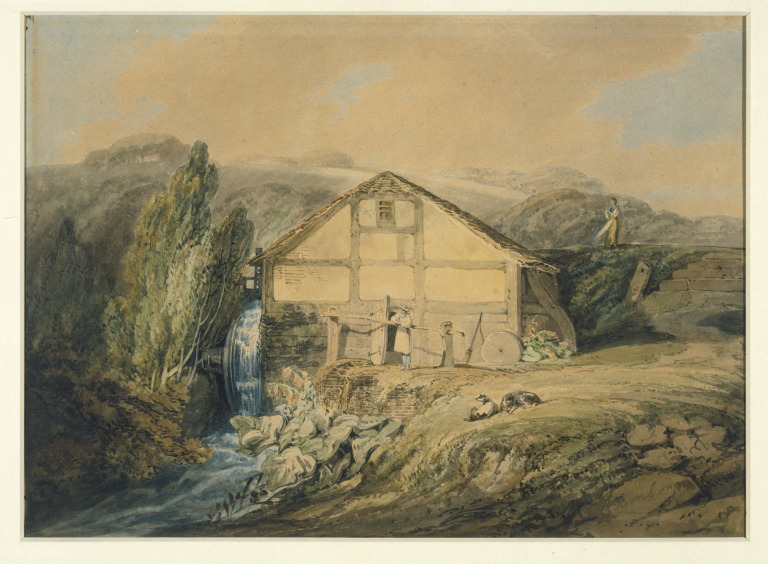

In [64]:
img_data = requests.get(url, stream = True).raw
display(Image.open(img_data))

Load it into the image and we see a pretty picture. 

---

You’ll learn in other sessions how to use and manipulate image data.

But now you can go and exercise your skills at retrieving it from the web.
